46. The Moving Average (MA) Model

In [1]:
# rt = c + theta1 * Epsilon t-1 + Epsilon t
# r - some TS variable
# rt - values of "r" in the current period
# theta1 - a numeric coefficient for the value associated with the 1st lag
# Epsilon t-1 - residuals for the past period
# Epsilon t - residuals for the current period

In [2]:
# Epsilon:

# we start at the beginning of the data set (Actual rt)
# and try to predict each value (Predicted rt)
# dependig on how far off we are each time, we get a residual (Epsilon t)
# therefor we generate this residuals as we go through the set
# and create the Epsilon variable as we move through time

In [3]:
# MA(1) is likely to AR(infinite) with some restrictions

# the only difference is that the AR model uses the value of the variable, while the MA model relies on the Residual

In [4]:
# to determine the maximum number of laggs we are willing to include in our MA models we rely on the ACF only 
# reason: the MA models aren't based on past period returns, therefor
# determining which lagged values have a significant direct effect on the present-day ones is not relevant

Importing the relevant Packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
from math import sqrt
import seaborn as sns
sns.set()

Importing the Data and Pre-Processing

In [4]:
raw_csv_data = pd.read_csv("/Users/ninalewandowska/Desktop/SGH/python_programming/TSA/Index2018.csv")
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace = True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method = 'ffill')

In [5]:
df_comp['market_value'] = df_comp.ftse

In [6]:
del df_comp['spx'], df_comp['dax'], df_comp['ftse'], df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

LLR test

In [50]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.llf
    L2 = mod_2.llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

Creating returns

In [51]:
df['returns'] = df.market_value.pct_change(1).mul(100)

/Users/ninalewandowska/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


ACF for Returns

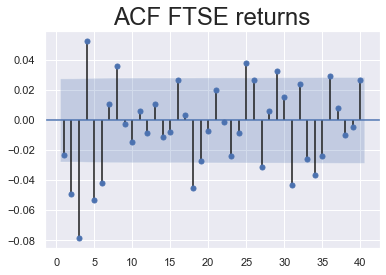

In [52]:
sgt.plot_acf(df.returns[1:], lags = 40, zero = False)
plt.title("ACF FTSE returns", size = 24)
plt.show()

47. Fitting an MA(1) Model for Returns

MA(1) for Returns

In [53]:
model_ret_ma_1 = ARMA(df.returns[1:], order=(0,1))
results_ret_ma_1 = model_ret_ma_1.fit()
print(results_ret_ma_1.summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 1)   Log Likelihood               -7929.595
Method:                       css-mle   S.D. of innovations              1.174
Date:                Wed, 17 Jun 2020   AIC                          15865.190
Time:                        16:54:14   BIC                          15884.754
Sample:                    01-10-1994   HQIC                         15872.045
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.016      1.162      0.245      -0.013       0.050
ma.L1.returns    -0.0257      0.015     -1.720      0.086      -0.055       0.004
                                    Root

In [19]:
# order = (P,Q) - P = AR components, Q = MA components

In [20]:
# p-value > 0,05 which suggests insignificance, however, from the ACF plot we can see that other coefficients fall out
# of the blue area, which suggest significance

48. Fitting Higher-Lag MA Models for Returns

In [54]:
model_ret_ma_2 = ARMA(df.returns[1:], order=(0,2))
results_ret_ma_2 = model_ret_ma_2.fit()
print(results_ret_ma_2.summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 2)   Log Likelihood               -7922.864
Method:                       css-mle   S.D. of innovations              1.173
Date:                Wed, 17 Jun 2020   AIC                          15853.728
Time:                        16:54:16   BIC                          15879.812
Sample:                    01-10-1994   HQIC                         15862.868
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.015      1.239      0.215      -0.011       0.049
ma.L1.returns    -0.0327      0.014     -2.297      0.022      -0.061      -0.005
ma.L2.returns    -0.0502      0.014     

In [ ]:
#p-value for the error term from two periods ago is significant (which matches our expectation from the ACF plots)
#p-value for the first lag is also significant (contrary to the previous model) which is exactly what we are aming for
#when fitting the more complex model
#we can say that MA(2)>MA(1) though we should check LLR which in this case doesn't work

In [103]:
LLR_test(results_ret_ma_1, results_ret_ma_2)

0.0

MA(3) Model

In [48]:
model_ret_ma_3 = ARMA(df.returns[1:], order=(0,3))
results_ret_ma_3 = model_ret_ma_3.fit()
print(results_ret_ma_3.summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 3)   Log Likelihood               -7904.317
Method:                       css-mle   S.D. of innovations              1.168
Date:                Wed, 17 Jun 2020   AIC                          15818.634
Time:                        16:53:31   BIC                          15851.240
Sample:                    01-10-1994   HQIC                         15830.060
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.376      0.169      -0.008       0.046
ma.L1.returns    -0.0203      0.014     -1.423      0.155      -0.048       0.008
ma.L2.returns    -0.0556      0.013     

In [104]:
LLR_test(results_ret_ma_2, results_ret_ma_3)

0.0

In [60]:
# finally MA(8)>MA(7) although MA(7) was not better than MA(6), MA(8) was better than MA(7) (see ACF plot)
#MA(8) is the best

49. Examining the MA Model Residuals for Returns

Residuals for Returns

In [61]:
model_ret_ma_8 = ARMA(df.returns[1:], order=(0,8))
results_ret_ma_8 = model_ret_ma_8.fit()
print(results_ret_ma_8.summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 8)   Log Likelihood               -7885.603
Method:                       css-mle   S.D. of innovations              1.164
Date:                Wed, 17 Jun 2020   AIC                          15791.205
Time:                        16:58:49   BIC                          15856.417
Sample:                    01-10-1994   HQIC                         15814.056
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.364      0.173      -0.008       0.046
ma.L1.returns    -0.0238      0.014     -1.688      0.091      -0.051       0.004
ma.L2.returns    -0.0495      0.014     

In [62]:
df['res_ret_ma_8'] = results_ret_ma_8.resid[1:]

/Users/ninalewandowska/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [65]:
print("The meand of the residuals is " + str(round(df.res_ret_ma_8.mean(),3)) + "\nThe variance of the residuals is " + str(round(df.res_ret_ma_8.var(),3)))

The meand of the residuals is -0.0
The variance of the residuals is 1.356


In [68]:
print("The standard deviation od the residuals is " + str(round(sqrt(df.res_ret_ma_8.var()),3)))

The standard deviation od the residuals is 1.164


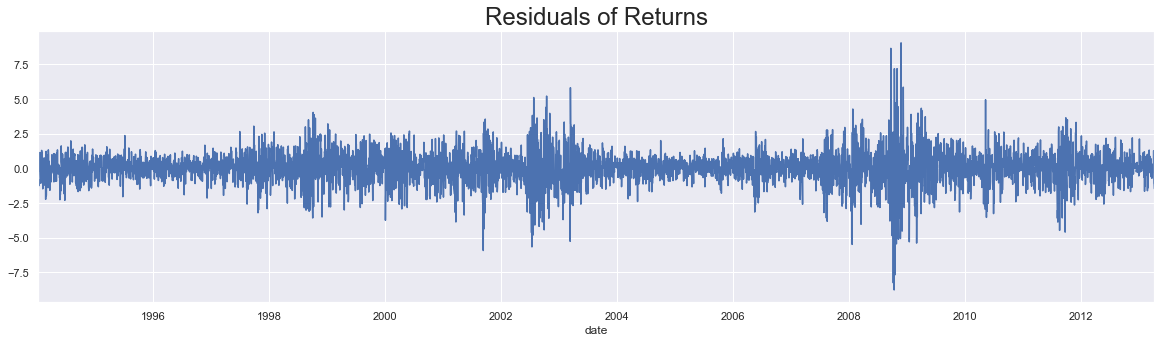

In [69]:
df.res_ret_ma_8[1:].plot(figsize = (20,5))
plt.title("Residuals of Returns", size = 24)
plt.show()

In [70]:
#testing if residuals follow white noise pattern (which we want)
#stationarity

In [71]:
sts.adfuller(df.res_ret_ma_8[2:])

(-70.83581608304624,
 0.0,
 0,
 5018,
 {'1%': -3.4316538358533277,
  '5%': -2.8621161549128313,
  '10%': -2.567076687880585},
 15684.052185203767)

In [72]:
#(second line) p-value is 0, so the set is stationary, but stationarity is not the same as wihite noise, so we
#have to examine the ACF of the residuals

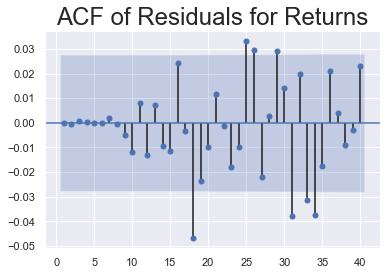

In [74]:
sgt.plot_acf(df.res_ret_ma_8[2:], zero = False, lags = 40)
plt.title("ACF of Residuals for Returns", size=24)
plt.show()

Normalized returns

In [82]:
bench_ret = df.returns.iloc[1]
df['norm_ret'] = df.returns.div(bench_ret).mul(100)

/Users/ninalewandowska/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [79]:
df.returns

date
1994-01-07         NaN
1994-01-10   -0.156704
1994-01-11   -0.779229
1994-01-12   -1.222988
1994-01-13   -0.356166
                ...   
2013-04-01    0.000000
2013-04-02    1.230867
2013-04-03   -1.084327
2013-04-04   -1.186397
2013-04-05   -1.487049
Freq: B, Name: returns, Length: 5021, dtype: float64

In [81]:
bench_ret

-0.1567043337454055

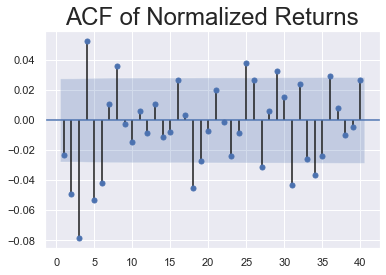

In [84]:
sgt.plot_acf(df.norm_ret[1:], zero = False, lags = 40)
plt.title("ACF of Normalized Returns", size=24)
plt.show()

In [85]:
#similar to ACF for Returns

In [86]:
model_norm_ret_ma_8 = ARMA(df.norm_ret[1:], order = (0,8))
results_norm_ret_ma_8 = model_norm_ret_ma_8.fit()
results_norm_ret_ma_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                     ARMA(0, 8)   Log Likelihood              -40307.597
Method:                       css-mle   S.D. of innovations            742.822
Date:                Wed, 17 Jun 2020   AIC                          80635.194
Time:                        18:41:27   BIC                          80700.406
Sample:                    01-10-1994   HQIC                         80658.045
                         - 04-05-2013                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -11.9759      8.846     -1.354      0.176     -29.314       5.362
ma.L1.norm_ret    -0.0238      0.014     -1.689      0.091      -0.051       0.004
ma.L2.norm_ret    -0.0495      0.014     -3.513      0.000      -0.077      -0.022
ma.L3.norm_ret    -0.0847      0.014     -5.992      0.000      -0.112      -0.057
ma.L4.norm_ret     0.0488      0.014      3.440      0.001       0.021       0.077
ma.L5.norm_ret    -0.0518      0.014     -3.634      0.000      -0.080      -0.024
ma.L6.norm_ret    -0.0402      0.014     -2.786      0.005      -0.068      -0.012
ma.L7.norm_ret     0.0083      0.014      0.586      0.558      -0.020       0.036
ma.L8.norm_ret     0.0366      0.014      2.627      0.009       0.009       0.064
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.4716           -0.4282j            1.5326           -0.0451
MA.2            1.4716           +0.4282j            1.5326            0.0451
MA.3            0.5944           -1.3169j            1.4448           -0.1825
MA.4            0.5944           +1.3169j            1.4448            0.1825
MA.5           -0.7317           -1.2737j            1.4689           -0.3330
MA.6           -0.7317           +1.2737j            1.4689            0.3330
MA.7           -1.4484           -0.6983j            1.6079           -0.4285
MA.8           -1.4484           +0.6983j            1.6079            0.4285
-----------------------------------------------------------------------------
"""

In [87]:
#results are identical to non normalized results
#normalizing the input data has no effect on model selection

In [88]:
df['res_norm_ret_ma_8'] = results_ret_ma_8.resid[1:]

/Users/ninalewandowska/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [89]:
df

,market_value,returns,res_ret_ma_8,norm_ret,res_norm_ret_ma_8
date,,,,,
1994-01-07,3445.98,NaN,NaN,NaN,NaN
1994-01-10,3440.58,-0.156704,NaN,100.000000,NaN
1994-01-11,3413.77,-0.779229,-0.802111,497.260711,-0.802111
1994-01-12,3372.02,-1.222988,-1.269464,780.443046,-1.269464
1994-01-13,3360.01,-0.356166,-0.464780,227.285567,-0.464780
...,...,...,...,...,...
2013-04-01,6411.74,0.000000,-0.028593,-0.000000,-0.028593
2013-04-02,6490.66,1.230867,1.269090,-785.471020,1.269090
2013-04-03,6420.28,-1.084327,-1.088285,691.957459,-1.088285


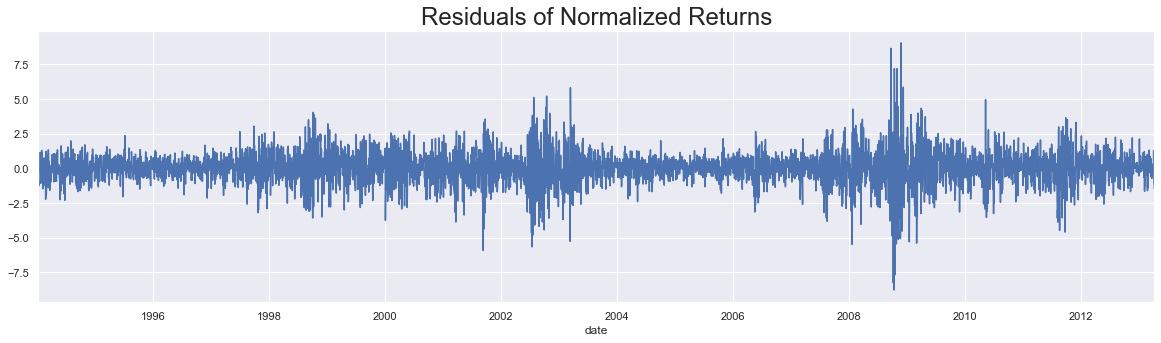

In [90]:
df.res_norm_ret_ma_8[1:].plot(figsize = (20,5))
plt.title("Residuals of Normalized Returns", size = 24)
plt.show()

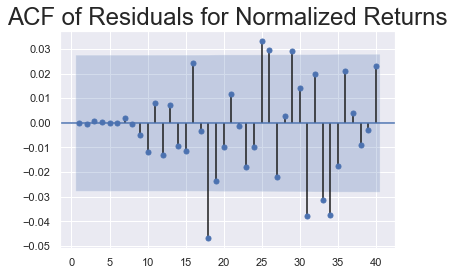

In [92]:
sgt.plot_acf(df.res_norm_ret_ma_8[2:], zero = False, lags = 40)
plt.title("ACF of Residuals for Normalized Returns", size=24)
plt.show()

In [ ]:
#the graph suggests that the data resembles white noise, so our model choice is supposedly correct
#white noise means the errors don't follow a pattern

51. Fitting an MA(1) model for Prices

MA Models For Prices

In [93]:
#Autoregressive (AR) models are less reliable when estimating non-stationary data
#We will see if the same goes for MA models

In [94]:
#AR -> PACF, MA -> ACF

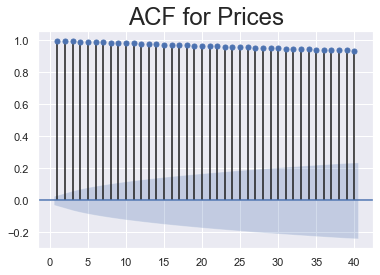

In [95]:
sgt.plot_acf(df.market_value, zero = False, lags = 40)
plt.title("ACF for Prices", size=24)
plt.show()

In [96]:
#every lag is significant what suggest that any MA(P+1)>Ma(P)
#it suggest no MA model would be good estimator for prices
#but we will try it anyway...

In [101]:
model_ma_1 = ARMA(df.market_value, order = (0,1))
results_ma_1 = model_ma_1.fit()
results_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(0, 1)   Log Likelihood              -38629.000
Method:                       css-mle   S.D. of innovations            530.756
Date:                Thu, 18 Jun 2020   AIC                          77264.000
Time:                        10:02:53   BIC                          77283.564
Sample:                    01-07-1994   HQIC                         77270.856
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.4929     14.660    347.180      0.000    5060.761    5118.225
ma.L1.market_value     0.9573      0.003    335.548      0.000       0.952       0.963
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.0446           +0.0000j            1.0446            0.5000
-----------------------------------------------------------------------------
"""

In [100]:
#constant and MA(1) coefficient is significant
#MA(1) coefficient is close to 1, so...
#...our model tries to keep almost the entire magnitude of the error term from the last period
#we can interprete it like this: each time a model wants to predict a value it actually tries to maximaze on the
#error from the last time
#since this is a simple model, with only 1 lag, the error term contains all the information from the other lags
#theta = coeff (in this case 0,9573)
#therefor our model is essentialy autoregressive model which takes into account the error from two terms ago
#x(t) = x(t-1) - epsilon(t-2) - epsilon(t)
#hence, MA(1) model with coeff close to 1 is just an approximation of any AR(n) model, which only takes the
#error term from n periods back

In [99]:
#We know that MA models do not perform well for non-stationary data
#BUT MA models are great in modelling Random Walks because they take into account our mistakes
#WELL Moving Average aspect does that, HOWEVER to actually do a decent job at modelling a non-stationary process
#a model should also use the previous period's values as a sort of diving board
#so combinations of AR and MA would be best

52. Past Values and Past Errors

In [ ]:
#AR model make good prediction, but fail to adjust quickly to unexpected shocks
# - MA aspects smooth out predictions
#MA model (account only for the residuals) it needs a baseline to perform well
# - so we have to use previous values to provide that
#ARMA - past values AND past errors 
#solves the issues each one has individually
#Auto-regressive Moving Average Model
#ARMA(1,2) 1-lagged values, 2- lagged errors

ARMA model estimates the actual r(t) and predicted r(t) (z daszkiem) which shows how far off our predictions were
this enables us to calibrate expectations on the go